In [3]:
import sys
FOLDER_PATH = 'yolo-v4-tf.keras'
sys.path.append(FOLDER_PATH)

In [11]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import os
import tensorflow as tf
from glob import glob

In [7]:
train_lines, val_lines = read_annotation_lines(os.path.join(FOLDER_PATH, 'dataset/train_txt/anno.txt'), test_size=0.1)
IMG_FOLDER_PATH = os.path.join(FOLDER_PATH)
class_name_path = os.path.join(FOLDER_PATH, 'class_names/bccd_classes.txt')
data_gen_train = DataGenerator(train_lines, class_name_path, IMG_FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, IMG_FOLDER_PATH)

model = Yolov4(weight_path=None, 
               class_name_path=class_name_path)

logs = model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10000, 
          val_data_gen=data_gen_val,
          #callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/y4.h5", save_best_only=True)]
          )

nms iou: 0.413 score: 0.3
Epoch 1/10000
41/41 [==============================] - 682s 17s/step - loss: 20355.9199 - val_loss: 20281.4062
Epoch 2/10000
41/41 [==============================] - 582s 14s/step - loss: 1861.8014 - val_loss: 5997.5771
Epoch 3/10000
41/41 [==============================] - 565s 14s/step - loss: 1744.7141 - val_loss: 3140.1433
Epoch 4/10000
41/41 [==============================] - 531s 13s/step - loss: 1543.4707 - val_loss: 2638.4109
Epoch 5/10000
41/41 [==============================] - 530s 13s/step - loss: 1268.5808 - val_loss: 3457.3091
Epoch 6/10000
41/41 [==============================] - 511s 12s/step - loss: 1045.3344 - val_loss: 3224.4688
Epoch 7/10000
41/41 [==============================] - 517s 13s/step - loss: 904.9736 - val_loss: 2785.3264
Epoch 8/10000
41/41 [==============================] - 520s 13s/step - loss: 830.8560 - val_loss: 2041.3229
Epoch 9/10000
41/41 [==============================] - 520s 13s/step - loss: 774.8517 - val_loss: 2044

KeyboardInterrupt: 

In [ ]:
model.yolo_model.save('last_y4.h5')

In [8]:
# build yolo model
model = Yolov4(class_name_path = class_name_path)

model.load_model('last_y4.h5')

nms iou: 0.413 score: 0.3
nms iou: 0.413 score: 0.3


In [12]:
img_paths = glob('yolo-v4-tf.keras/dataset/train_img/*.jpg')
len(img_paths)

364

img shape:  (480, 640, 3)
# of bboxes: 15


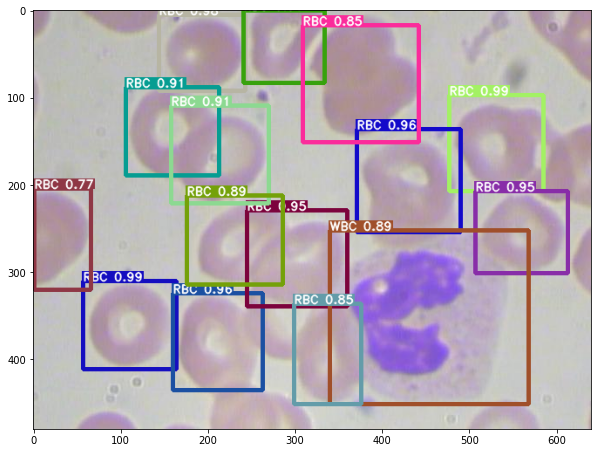

,x1,y1,x2,y2,class_name,score,w,h
0,57,310,164,411,RBC,0.989906,107,101
1,477,97,585,207,RBC,0.985583,108,110
2,144,5,243,92,RBC,0.984805,99,87
3,371,136,490,254,RBC,0.958604,119,118
4,160,324,263,435,RBC,0.955440,103,111
5,245,229,360,339,RBC,0.948260,115,110
6,507,207,613,301,RBC,0.945052,106,94
7,106,88,213,189,RBC,0.912507,107,101
8,241,0,334,83,RBC,0.912132,93,83
9,158,109,270,221,RBC,0.909711,112,112


In [5]:
path = np.random.choice(img_paths, 1)[0]
model.predict(path)